In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows",1200)
pd.set_option("display.max_columns",50)

sns.set(font_scale=1)

np.random.seed(5)

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve


In [2]:
df = pd.read_csv("train2.csv")

In [3]:
df.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [4]:
df.shape

(1011, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 24 columns):
loan_duration_mo       1011 non-null float64
loan_amount            1011 non-null float64
payment_pcnt_income    1011 non-null float64
time_in_residence      1011 non-null float64
age_yrs                1011 non-null float64
number_loans           1011 non-null float64
dependents             1011 non-null float64
CAS1                   1011 non-null float64
CAS2                   1011 non-null float64
CAS3                   1011 non-null float64
CH1                    1011 non-null float64
CH2                    1011 non-null float64
CH3                    1011 non-null float64
CH4                    1011 non-null float64
TE1                    1011 non-null float64
TE2                    1011 non-null float64
TE3                    1011 non-null float64
TE4                    1011 non-null float64
OC1                    1011 non-null float64
OC2                    1011 non-null f

### Split data

In [6]:
X = df.iloc[:,0:23]
y = df.iloc[:,23]

In [7]:
X.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3
0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: bad_credit, dtype: float64

In [9]:
X.values, y.values

(array([[0.64705882, 0.31368989, 0.33333333, ..., 0.        , 1.        ,
         0.        ],
        [0.11764706, 0.10157368, 0.33333333, ..., 1.        , 0.        ,
         0.        ],
        [0.55882353, 0.41994057, 0.33333333, ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.11764706, 0.03048311, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.60294118, 0.08776274, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.60294118, 0.23803235, 0.66666667, ..., 0.        , 1.        ,
         0.        ]]), array([1., 0., 0., ..., 0., 1., 0.]))

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [11]:
X_train.shape

(808, 23)

In [12]:
X_test.shape

(203, 23)

### Perform cross-validation

In [13]:
gbc = GradientBoostingClassifier(random_state=5)

In [14]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
gbc.score(X_test,y_test)

0.7241379310344828

In [16]:
cross_val_score(gbc,X,y,cv=5)

array([0.73891626, 0.75247525, 0.73267327, 0.71287129, 0.72277228])

In [17]:
mean_gbc = np.mean(cross_val_score(gbc,X,y,cv=5))
mean_gbc

0.7319416670731111

In [18]:
cross_val_score(gbc,X,y,cv=5,scoring='f1')

array([0.48543689, 0.55357143, 0.44897959, 0.43137255, 0.48148148])

In [19]:
f1_gbc = np.mean(cross_val_score(gbc,X,y,cv=5,scoring='f1'))
f1_gbc

0.48016838882262725

In [20]:
cross_val_score(gbc,X,y,cv=5,scoring='roc_auc')

array([0.78284461, 0.78025811, 0.7806338 , 0.75176056, 0.74366197])

In [21]:
roc_gbc = np.mean(cross_val_score(gbc,X,y,cv=5,scoring='roc_auc'))
roc_gbc

0.7678318112371473

### Make Prediction

In [22]:
y_pred = gbc.predict(X_test)

In [23]:
y_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

### Model Evaluation

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[122,  20],
       [ 36,  25]], dtype=int64)

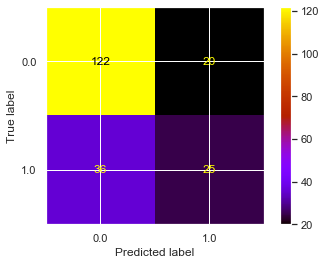

In [25]:
plot_confusion_matrix(gbc,X_test,y_test,cmap='gnuplot',values_format='.3g')
plt.show()

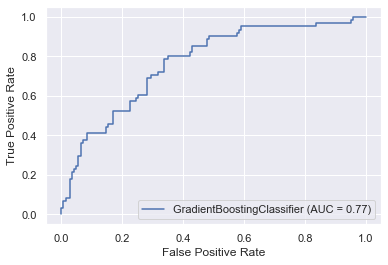

In [26]:
plot_roc_curve(gbc,X_test,y_test)
plt.show()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       142
         1.0       0.56      0.41      0.47        61

    accuracy                           0.72       203
   macro avg       0.66      0.63      0.64       203
weighted avg       0.71      0.72      0.71       203

